<center><h1> Exploring Madrid's housing market </h1></center>
    <center><h2>           created by Juan Ramón Selva and Gladys Kenyon for the SDSC 2022                          </h2></center>

<center><h2> https://github.com/gladyskenyon/SDSC_22_workshop   </h2></center>
<center><h4> Twitter: gekenyon, Email: g.e.kenyon@liverpool.ac.uk  </h4></center>

<center><h3> Introduction </h3></center>

<center><h4> 'A picture is worth a thousand words' </h4></center>

Often, complex ideas and relationships can be conveyed quickly and more effectively using a single image than by written word. In data science, visualising data is a key step of analysis to explore its form. Additionally, spatial visualisations and analytics are powerful and insightful tools to understand geographical data.

The following workbook takes you through a spatial analysis of the 2018 housing market in Madrid. Quantitative analyis and several geovisualisations will be made to present spatial residential patterns. Finally an unsupervised machine learning algorithm (k-means) allows us to create groups of similar properties (sub-markets) based on their attributes.

The data is provided by Idealista, a major property advertisement company which operates in Southern Europe. The data is openly available and liscenced in the package idealista18 (https://github.com/paezha/idealista18). 

There are several data sources used in the analysis. The data folder contains seperate folders for Madrid, Barcleona and Valencia. There is a 'Sale' file for each city, which contains quarterly single family listings for 2018, provided by idealista. Some of the variables within the sales data are sourced from the Cadastral (official building register in Spain). Other data includes the neighourhood polygons built by idealista (idealista_level8), administrative boundaries (city_dist) and building footprints (polygons_inspire_buildings). We will be using the Madrid data, if you have time to spare at the end of the session or in future, there is the same data on github for Barcelona and Valencia.

### Contents:

### Getting Started

### Section 1: Exploratory (Spatial) Data Analysis
* Section 1A: Visualisations
* Section 1B: Geovisualisations  

### Section 2: Unsupervised Machine learning  
* Section 2A: Clustering using K-Means
* Section 2B: Optional Exersize 



### Getting started

We will start by loading the required libraries and data. The word file 'Metadata' on the github repository provides detail on the attributes included in the property listings data sets. Spend some time getting familiar with the property data we have. We will also create some new variables..

In [16]:
# Load in libraries, we will refer to them using the shorthand
import numpy as np   # Mathematical data manipulation 
import pandas as pd  # Data manipulation and analysis
import geopandas as gpd # Working with geospatial data
import contextily as cx # For creating basemaps
import seaborn as sns   # Data visualisation library
import matplotlib.pyplot as plt # Another data visualisation library
from shapely.geometry import Point # Analysis of geometric objects
from sklearn import cluster        # Clustering machine learning library
from sklearn.cluster import KMeans # Import kmeans 
from sklearn.metrics import silhouette_score, calinski_harabasz_score   # For evaluating clusters

**Madrid Sale data**

In [2]:
# Load in house price sales data. You will need to include your file path if you are running this locally on your machine
mad_s = pd.read_csv('data/madrid/Madrid_Sale.csv',index_col=False)

In [3]:
# Check the data read in correctly 
# Use the .head() function on any dataframe to show the first 5 rows 
mad_s.head()

ID  period   price        unitp  area  room  bath  \
0  A15019136831406238029  201803  126000  2680.851064    47     1     1   
1   A6677225905472065344  201803  235000  4351.851852    54     1     1   
2  A13341979748618524775  201803  373000  4973.333333    75     2     1   
3   A4775182175615276542  201803  284000  5916.666667    48     1     1   
4   A2492087730711701973  201803  228000  4560.000000    50     0     1   

   terrace  aircon  parking  ...  topfloor  conyr  maxfloor  dcount  quality  \
0        0       1        0  ...         0   2005         7     319        3   
1        0       0        0  ...         0   1900         5      11        3   
2        0       1        0  ...         0   1915         6      26        3   
3        0       1        0  ...         0   1947         9      15        5   
4        0       0        0  ...         0   1930         5      19        7   

   newdev  dist_city_centre  dist_metro      long        lat  
0       0          8.058429    0.872075 -3.766933  40.362485  
1       0          0.876369    0.116382 -3.710725  40.422430  
2       0          0.907479    0.139109 -3.711571  40.422190  
3       0          0.845462    0.144299 -3.710440  40.422251  
4       0          1.250231    0.337098 -3.714340  40.408741  

[5 rows x 28 columns]

In [9]:
# .info gives a summary of variables and data types
mad_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94814 entries, 0 to 94813
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                94814 non-null  object 
 1   period            94814 non-null  int64  
 2   price             94814 non-null  int64  
 3   unitp             94814 non-null  float64
 4   area              94814 non-null  int64  
 5   room              94814 non-null  int64  
 6   bath              94814 non-null  int64  
 7   terrace           94814 non-null  int64  
 8   aircon            94814 non-null  int64  
 9   parking           94814 non-null  int64  
 10  north             94814 non-null  int64  
 11  south             94814 non-null  int64  
 12  east              94814 non-null  int64  
 13  west              94814 non-null  int64  
 14  swimpool          94814 non-null  int64  
 15  garden            94814 non-null  int64  
 16  duplex            94814 non-null  int64 

* There are 94,814 houses in the dataset

**Python Data Types**

|Data Type |Examples |
|----------------|---------------------------------------
|Integers  |-2, -1, 0, 1, 2, 3, 4, 5 |
|Floating-point numbers |-1.25, -1.0, --0.5, 0.0, 0.5, 1.0, 1.25 |
|Strings|'a', 'aa', 'aaa', 'Hello!', '11 cats' |

In [17]:
# List data types of variables in data frame 
mad_s.dtypes

ID                   object
period                int64
price                 int64
unitp               float64
area                  int64
room                  int64
bath                  int64
terrace               int64
aircon                int64
parking               int64
north                 int64
south                 int64
east                  int64
west                  int64
swimpool              int64
garden                int64
duplex                int64
studio                int64
topfloor              int64
conyr                 int64
maxfloor              int64
dcount                int64
quality               int64
newdev                int64
dist_city_centre    float64
dist_metro          float64
long                float64
lat                 float64
dtype: object

In [19]:
# Change data type of ID to string
mad_s['ID'].astype('string')

0        A15019136831406238029
1         A6677225905472065344
2        A13341979748618524775
3         A4775182175615276542
4         A2492087730711701973
                 ...          
94809     A3962186799478940177
94810     A3876164367053781729
94811    A17768295786772492698
94812    A15733144649359668635
94813     A9716488392839016117
Name: ID, Length: 94814, dtype: string

**Idealista boundaries**

In [4]:
# Read in neighbourhood boundary files as a geodataframe (using geopandas)
mad_neighb = gpd.read_file('data/madrid/idealista_level8_mad.geojson')
# Check they plot correctly 
mad_neighb.plot()

DriverError: 'data/madrid/idealista_level8_mad.geojson' not recognized as a supported file format.

In [6]:
# Sort the table by locationid, note that the last two numbers are unique for each polygon
mad_neighb.sort_values(by=['locationid'])

locationid                      locationname  \
69   0-EU-ES-28-07-001-079-01-001                           Palacio   
63   0-EU-ES-28-07-001-079-01-002              Lavapiés-Embajadores   
17   0-EU-ES-28-07-001-079-01-003                    Huertas-Cortes   
78   0-EU-ES-28-07-001-079-01-004                   Chueca-Justicia   
0    0-EU-ES-28-07-001-079-01-005              Malasaña-Universidad   
..                            ...                               ...   
108  0-EU-ES-28-07-001-079-21-001                  Alameda de Osuna   
82   0-EU-ES-28-07-001-079-21-002                        Aeropuerto   
109  0-EU-ES-28-07-001-079-21-003        Casco Histórico de Barajas   
13   0-EU-ES-28-07-001-079-21-004                             Timón   
15   0-EU-ES-28-07-001-079-21-005  Campo de las Naciones-Corralejos   

                                              geometry  
69   POLYGON ((-3.72044 40.42028, -3.72097 40.42003...  
63   POLYGON ((-3.71041 40.40881, -3.71104 40.40803...  
17   POLYGON ((-3.69649 40.41881, -3.69969 40.41976...  
78   POLYGON ((-3.70026 40.41988, -3.69969 40.41976...  
0    POLYGON ((-3.71312 40.43034, -3.71628 40.43063...  
..                                                 ...  
108  POLYGON ((-3.60419 40.45129, -3.60387 40.44983...  
82   POLYGON ((-3.59221 40.45017, -3.58288 40.45000...  
109  POLYGON ((-3.58209 40.46785, -3.58134 40.46740...  
13   POLYGON ((-3.58174 40.47973, -3.60157 40.47986...  
15   POLYGON ((-3.60551 40.45297, -3.60535 40.45281...  

[135 rows x 3 columns]

**Building footprints**

In [5]:
# Read in cadastral building footprints
mad_cadastre = gpd.read_file('data/madrid/polygons_inspire_building_28079_202205.geojson')
# .info gives a summary of variables and data types
mad_cadastre.info()

DriverError: 'data/madrid/polygons_inspire_building_28079_202205.geojson' not recognized as a supported file format.

**Data Manipulation**

Run these lines to create new variables that will be needed for the analysis.

In [40]:
# Create a column called count that assigns a '1' to each observation
mad_s['count']='1'
# Change data type to integer 
mad_s['count'] = mad_s['count'].astype('int')

In [7]:
# Create geometry column for each df
mad_s['geometry'] = [Point(xy) for xy in zip(mad_s['long'], mad_s['lat'])]

In [8]:
# Define crs
# Coordinate reference system : WGS84
crs=4326

# Create geodataframe 
# Convert to geodataframe, use geometry column as geometry 
mad_s2 = gpd.GeoDataFrame(mad_s, geometry='geometry', crs=crs)

In [11]:
# Create new variable which splits price into deciles 
mad_s2['p_decile'] = pd.qcut(mad_s['price'], 10, labels=False)

In [12]:
# Check it worked 
mad_s2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 94814 entries, 0 to 94813
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                94814 non-null  object  
 1   period            94814 non-null  int64   
 2   price             94814 non-null  int64   
 3   unitp             94814 non-null  float64 
 4   area              94814 non-null  int64   
 5   room              94814 non-null  int64   
 6   bath              94814 non-null  int64   
 7   terrace           94814 non-null  int64   
 8   aircon            94814 non-null  int64   
 9   parking           94814 non-null  int64   
 10  north             94814 non-null  int64   
 11  south             94814 non-null  int64   
 12  east              94814 non-null  int64   
 13  west              94814 non-null  int64   
 14  swimpool          94814 non-null  int64   
 15  garden            94814 non-null  int64   
 16  duplex        

## Section 1: Exploratory (Spatial) Data Analysis
* Setion 1A: Visualisations
* Section 1B: Geovisualisations 

In section 1A we will do the following..
* Understand the distribution of the variables in the data
* Analyze the frequency and other such characteristics of data
* Visualize the relationship that may exist between different variables

Understanding the trends and patterns of data is a key first step in any analysis. A great resource is the [python graph gallery](https://python-graph-gallery.com/), a collection of 100's of charts made with python, including reproducible code. Most of these will be made with the seaborn package. Lets take a look.

### Section 1A: Visualisations

**Univariate statistics**

Univariate analysis is a technique to analyse one variable's range and measures of central tendency (average). 

In [13]:
# Create a table showing univariate statistics for each variable in the dataset
# Round to 2 decimal places
np.round(mad_s.describe().T, 2)

count       mean        std        min        25%  \
period            94814.0  201808.61       3.68  201803.00  201806.00   
price             94814.0  396112.27  417076.08   21000.00  160000.00   
unitp             94814.0    3661.08    1700.49     805.31    2240.00   
area              94814.0     101.40      67.08      21.00      62.00   
room              94814.0       2.58       1.24       0.00       2.00   
bath              94814.0       1.59       0.84       0.00       1.00   
terrace           94814.0       0.36       0.48       0.00       0.00   
aircon            94814.0       0.45       0.50       0.00       0.00   
parking           94814.0       0.23       0.42       0.00       0.00   
north             94814.0       0.11       0.31       0.00       0.00   
south             94814.0       0.24       0.42       0.00       0.00   
east              94814.0       0.20       0.40       0.00       0.00   
west              94814.0       0.15       0.36       0.00       0.00   
swimpool          94814.0       0.15       0.36       0.00       0.00   
garden            94814.0       0.18       0.39       0.00       0.00   
duplex            94814.0       0.03       0.16       0.00       0.00   
studio            94814.0       0.03       0.16       0.00       0.00   
topfloor          94814.0       0.02       0.15       0.00       0.00   
conyr             94814.0    1965.70      29.11    1623.00    1955.00   
maxfloor          94814.0       6.38       2.85       0.00       5.00   
dcount            94814.0      39.19      54.25       1.00      12.00   
quality           94814.0       4.85       1.46       0.00       4.00   
newdev            94814.0       0.03       0.17       0.00       0.00   
dist_city_centre  94814.0       4.48       2.68       0.01       2.41   
dist_metro        94814.0       0.48       0.61       0.00       0.21   
long              94814.0      -3.69       0.04      -3.83      -3.71   
lat               94814.0      40.42       0.03      40.33      40.40   
count             94814.0       1.00       0.00       1.00       1.00   
p_decile          94814.0       4.49       2.88       0.00       2.00   

                        50%        75%         max  
period            201809.00  201812.00   201812.00  
price             262000.00  467000.00  8133000.00  
unitp               3480.00    4744.65     9997.56  
area                  83.00     117.00      985.00  
room                   3.00       3.00       93.00  
bath                   1.00       2.00       20.00  
terrace                0.00       1.00        1.00  
aircon                 0.00       1.00        1.00  
parking                0.00       0.00        1.00  
north                  0.00       0.00        1.00  
south                  0.00       0.00        1.00  
east                   0.00       0.00        1.00  
west                   0.00       0.00        1.00  
swimpool               0.00       0.00        1.00  
garden                 0.00       0.00        1.00  
duplex                 0.00       0.00        1.00  
studio                 0.00       0.00        1.00  
topfloor               0.00       0.00        1.00  
conyr               1967.00    1984.00     2018.00  
maxfloor               6.00       8.00       26.00  
dcount                21.00      40.00     1499.00  
quality                5.00       6.00        9.00  
newdev                 0.00       0.00        1.00  
dist_city_centre       4.12       6.21       14.16  
dist_metro             0.33       0.52        9.43  
long                  -3.69      -3.67       -3.54  
lat                   40.42      40.44       40.52  
count                  1.00       1.00        1.00  
p_decile               4.00       7.00        9.00

**Histograms and Kernel Density Estimation (KDE)**

The purpose of a histogram is to understand the distribution of numerical data.  The height of the bar represents the number of values in the data set that fall into that bin (equal class intervals of the variable's range). The following code chunk plots a histogram of a variable's frequency. For further information on histograms check out this [resource ](https://statisticsbyjim.com/basics/histograms/).

* Change the variable to explore different continuous distributions of the attributes, e.g price, unitp, area, conyr, dcount, maxfloor, dist_city_centre, dist_metro. 

KDE is a data smoothing operation, it estimates a probability density function of variable. Read more [here]( https://bit.ly/3ypJRM2). A KDE is added to the histogram the show the smoothed distribution. 
A [rug plot](https://medium.com/dssimplified/how-to-interpret-plots-graphs-eaef109e276c) is shown at the bottom of the histogram, it shows the distribution of raw points.

Text(0.5, 1.0, 'Unit price distribution in Madrid (2018)')

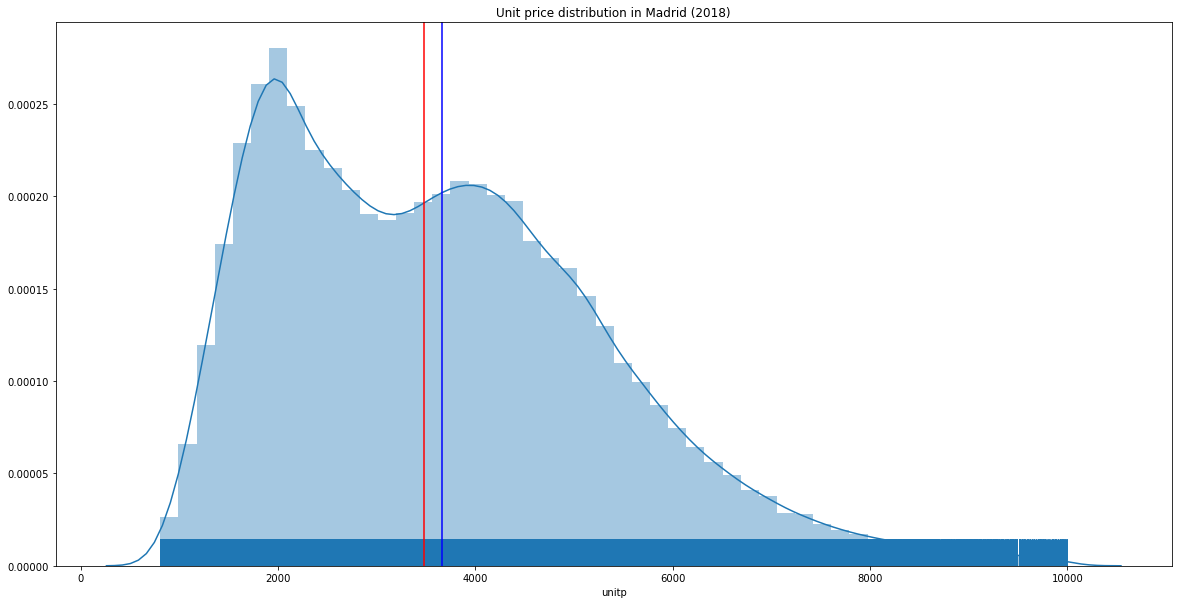

In [35]:
# Set up subplots with one plot, set the figure size too
f, axs = plt.subplots(1, figsize=(20, 10))
sns.distplot(mad_s["unitp"],                 # Change the variable in sqaure brackets to explore other distibutions
             kde=True,                      # Sow KDE
             rug=True,                      # Show rug plot
             bins=50,                       # You can change the number of bins here   
             ax=axs)                        # plot in the axis defined in line 1
axs.axvline(x=mad_s.unitp.median(),     # Add a line to show the median, you will need to change the variable here too 
            color='red')
#axs.text(10, 5, 'Median', color='red', fontsize=16)
axs.axvline(x=mad_s.unitp.mean(),     # Add a line to show the mean, you will need to change the variable here too 
            color='blue')

# Give each graph a title
axs.set_title("Unit price distribution in Madrid (2018)")

**Distribution of unit price**

We are particularly interested in the distribution of the price variables. Unit price is a better measure than price as it controls for the size of properties (larger houses tend to be more expensive).
* Unit price is skewed to the right
* Two peaks in the data suggest a slight bimodal distribution, indicating there are two main groups of property prices
* Interesting peak in unit prices around 4000 euros
* Evidence of outliers (long tail)

**Bar plots**

Many of the variables in the dataset are binary, which means they have 2 categories. These indicate the presence of certain structural attributes (see metadata). We can visualise their frequency using bar charts. 

* Change the 'x' value to explore other binary/ categorical variables (terrace, duplex, parking, studio, topfloor, south, north, east, west).

In [16]:
# Create bar plots of binary variables
# Create subplots
f, axs= plt.subplots(1, 3, figsize=(30, 10))
# Plot barplot
sns.barplot(
    x="swimpool",      # Change the variable in "" to explore other variables
    y="count", 
    data=mad_s, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    ax=axs[0])
# Plot barplot
sns.barplot(
    x="duplex",      # Change the variable in "" to explore other variables
    y="count", 
    data=mad_s, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    ax=axs[1])
# Plot barplot
sns.barplot(
    x="aircon",     # Change the variable in "" to explore other variables
    y="count", 
    data=mad_s, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    ax=axs[2])

# Give each graph a title
axs[0].set_title("Frequency of swimming pool attribute")
axs[1].set_title("Frequency of garden attribute")
axs[2].set_title("Frequency of aircon attribute")

Text(0.5, 1.0, 'Frequency of aircon attribute')

**Question: What is the frequency of the garden attribute for north, south, east, west variables?**

**Frequency of adverts across the year 2018**

The following bar chart shows the number of adverts in each quarter of the year. There are more houses avertised in the first and final quarter of the year. The most properties (40000 +) are advertised between October and December (201812).

Text(0.5, 1.0, 'Number of properties in each quarter')

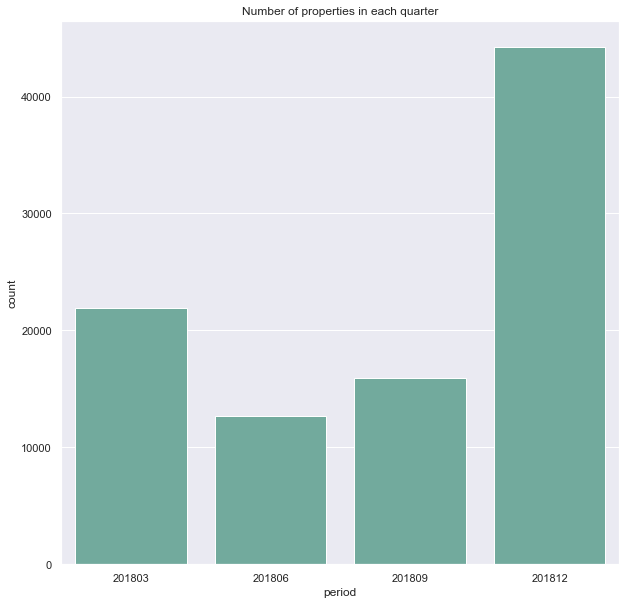

In [42]:
# plot a bar chart showing the number of adverts per period in each city 
# Set the background style of the maps 
sns.set(style="darkgrid")
# Create subplots
f, axs = plt.subplots(1, figsize=(10, 10))
sns.barplot(
    x="period", 
    y="count", 
    data=mad_s, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2',
    ax=axs)

# Set title 
axs.set_title("Number of properties in each quarter")


**Frequency of houses built across years**

We can explore when the properties advertised in 2018 were built using the variable 'conyr'. This gives some indication of the development of the residential market over time. 


In [18]:
# Create bar plot showing the number of houses built in each year
# Create subplots
f, axs= plt.subplots(1, figsize=(30, 20))
sns.barplot(
    x="conyr", 
    y="count", 
    data=mad_s, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')
plt.xticks(rotation=90);

axs.set_title("Year that the advertised properties were constructed")


Text(0.5, 1.0, 'Year that the advertised properties were constructed')

* There are two noteable peaks in the construction year of properties in the data (1960- 1980) and (2000- 2009)
* The fall in houses built from 2008 is likely to be associted with the US subprime mortgate crisis and financial crash
* Some properties advertised in 2018 were built as early as 1623

**Visualising bivariate relationships**

The following sub-section visualises the relationships that exist between different variables, particularly important is the relationship between price and the property characteristics. In hedonic price modelling, a properties price is estimated based on its attributes; these include internal factors (e.g. number of bedrooms) and external ones (amenities, environment, neighbourhood) ([Chau and Chin, 2003](https://www.researchgate.net/profile/Chau-Kwong-Wing/publication/255726402_A_Critical_Review_of_Literature_on_the_Hedonic_Price_Model/links/0deec53332581327f4000000/A-Critical-Review-of-Literature-on-the-Hedonic-Price-Model.pdf)) . A hedonic pricing model is often used to estimate quantitative values of properties internal and external characteristics that directly affect market prices for homes. Or to conduct mass appraisal ([Wang and Li, 2019](https://www.mdpi.com/2071-1050/11/24/7006)).

**Scatter Plots**

Scatter plots are commonly used to visualise the relationship between two continuous variables.

In [19]:
# Plot a scatter plot using the price and area variables for each city
f, axs= plt.subplots(1, figsize=(30, 10))
mad_s.plot.scatter(y='price', x='area', marker='o', ax=axs)
axs.set_title("Relationship between price and the size of the house")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Relationship between price and the size of the house')

The function pairplot helps us to visualise multiple bivariate relationships in the data with one plot (info on the [function](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

In [20]:
# Create sub set of continuous variables from Madrid data
pairplot = mad_s[['unitp', 'price' 'room', 'bath', 'conyr', 'maxfloor', 'dcount', 'dist_city_centre', 'dist_metro']]

# Plot pairplot of scatter plots using the subsection of data 
sns.pairplot(pairplot, kind="scatter")
plt.show()
 

We can see from the pairplot that many of relationships between the variables are non-linear (a change in one variable does not correspond with a  constant change in another).
* For example maxfloor and dist_city_centre appear to have no correlation
* Some relationships look like they may have a curved line of best fit (e.g. dcount and conyr)
* Can see some clusters (groups) of data points (e.g. unitp and dist_metro)
* Some outliers are skewing the plots (e.g. room and unitp)

**Strip plots**

Strip plots are a type of scatter plot which are suitable when one of the variables is categorial. 
The code chunk below shows the relationship between the quality of the housing and the construction year. 

In [58]:
# Set up axis 
f, axs = plt.subplots(1, figsize=(10, 10))
# Madrid 
sns.stripplot(x=mad_s['quality'], y=mad_s['conyr'],
    ax=axs)


axs.set_title("A strip plot of quality accross construction year")

Text(0.5, 1.0, 'A strip plot of quality accross construction year')

**Boxplots**

Boxplots are a well used technique for visulising the relationship between a continuous and categorical variable. If you are unsure on how to interpret boxplots check out this handy [resource](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

The following figure plots a boxplot for the binary housing attribute variables and unit price, using the pandas library. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

<AxesSubplot:title={'center':'unitp'}, xlabel='terrace'>

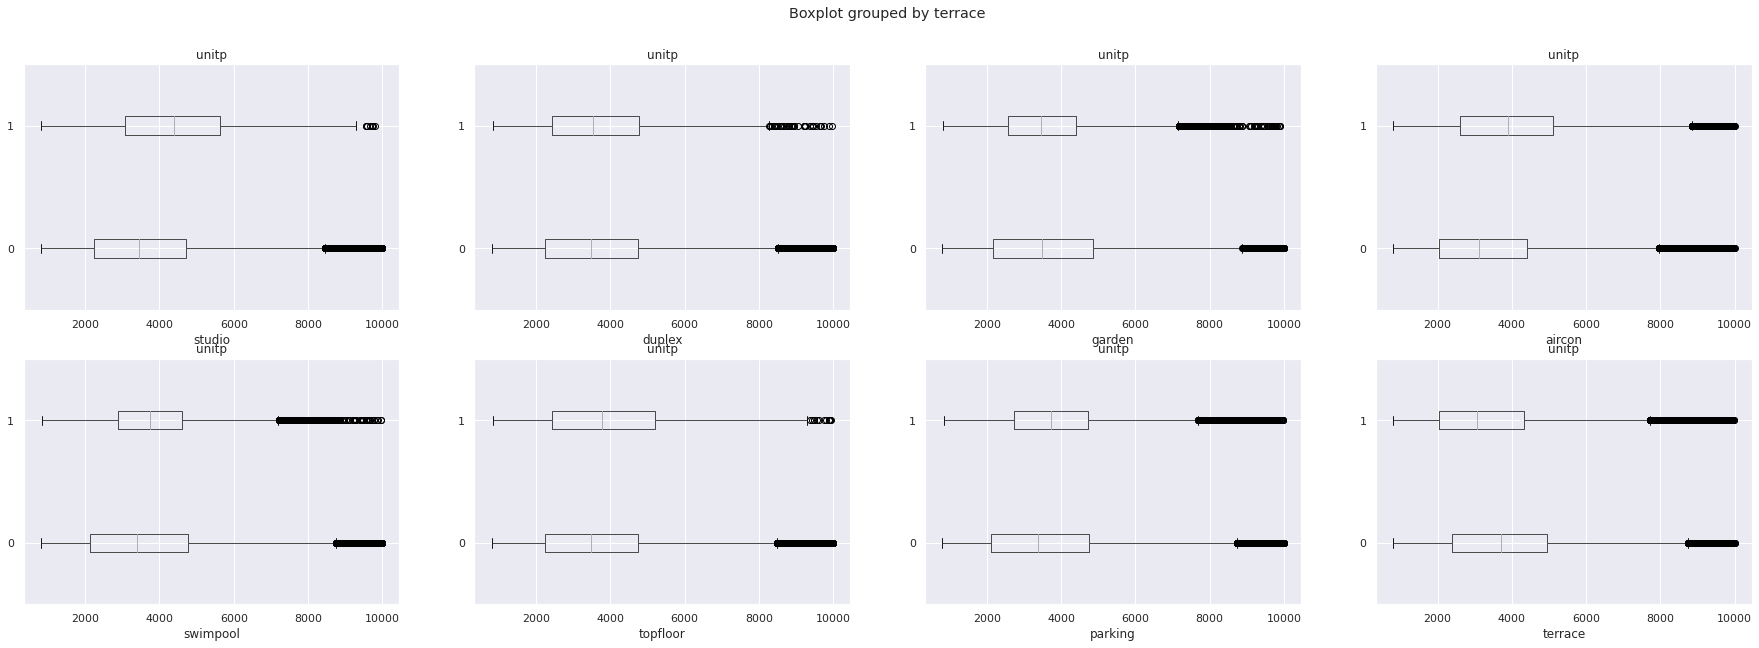

In [22]:
# Create boxplots of binary variables and outcome variable unitprice
f, axs = plt.subplots(2, 4, figsize=(30, 10))
mad_s.boxplot(column='unitp', by='studio', ax=axs[0,0], vert=False)
mad_s.boxplot(column='unitp', by='duplex', ax=axs[0,1], vert=False)
mad_s.boxplot(column='unitp', by='garden', ax=axs[0,2], vert=False)
mad_s.boxplot(column='unitp', by='aircon', ax=axs[0,3], vert=False)
mad_s.boxplot(column='unitp', by='swimpool', ax=axs[1,0], vert=False)
mad_s.boxplot(column='unitp', by='topfloor', ax=axs[1,1], vert=False)
mad_s.boxplot(column='unitp', by='parking', ax=axs[1,2], vert=False)
mad_s.boxplot(column='unitp', by='terrace', ax=axs[1,3],vert=False)

Some key trends:
* The average unit price for studios is higher than other properties, although there are some expensive non-studies
* On average, having a garden doesn't make your houses more expensive
* Having air con means the average unit price of a house is higher

**Correlation**

A correlation is a statistical measure of the linear relationship between two variables. The range of scores goes from -1 to 1, a score of 0 = no relationship, 1 = exactly positively correlated, -1 means there relationship is negative and vise versa (if you are unsure see [here](https://www.simplypsychology.org/correlation.html)). A correlation matrix is an excellent way to visualise the correlation between all the variables in the data set. Most of the variables have a correlation score of around 0. Some of the variables (Madrid) are strongly correlated with price e.g. area and price have a positive correlation (0.77). Or price and quality (-0.52). Correlation between variables (known as multicollinearity) can be a problem in regression.


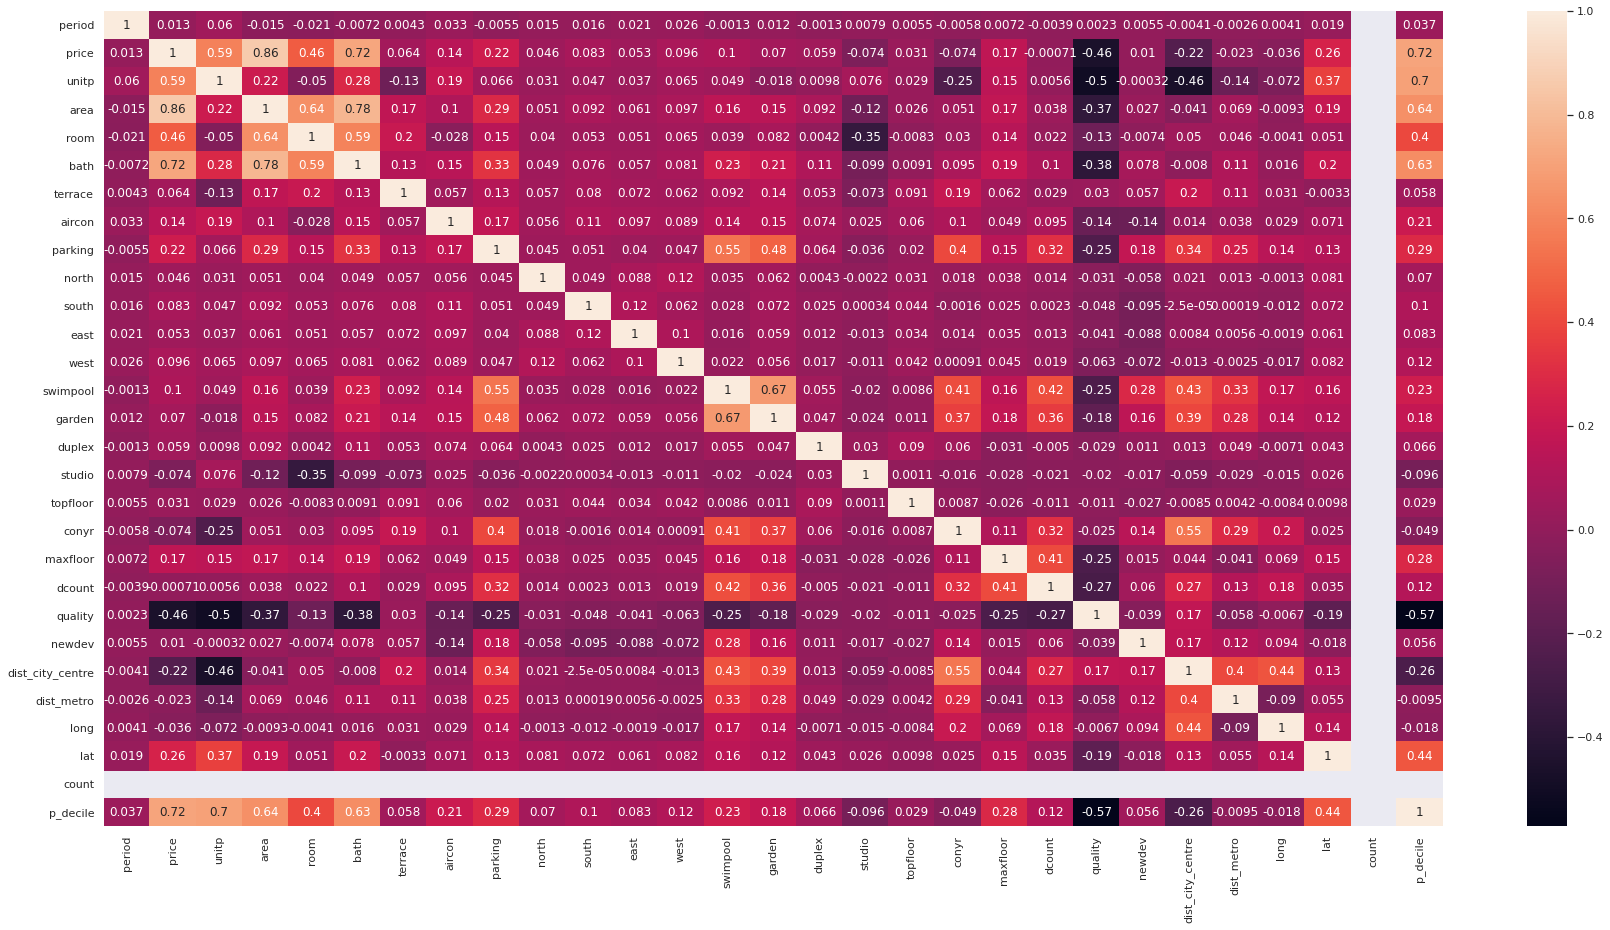

In [23]:
# Calculate correlations between all variables
corrMatrix = mad_s.corr()               # Change the 'val_s' to 'bar_s' or 'mad_s' to explore correlations in other cities 
# Specify axis size 
fig, ax = plt.subplots(figsize=(30,15))
# Use seaborn to plot correlations on a heatmap
sns.heatmap(corrMatrix, annot=True, ax=ax)
# Show figure 
plt.show()

#### TASK
**Can you make a new type of plot using code from the [python graph gallery](https://python-graph-gallery.com/)?**


In [ ]:
# New plot e.g. Violin or Bubble plot

### Section 1B: Geo-visualisations
Now we have undertaken some exploratory data analysis, we can turn our focus to the exciting bit.. understanding the distribution of variables over space.  

'Mapmaking, or cartography, is the visualization of geospatial data. It’s an art in that it seeks to represent data in a form that can be more easily understood and interpreted by non-technical audiences. But it’s also a science in making sure the visuals accurately conform to the data that they’re based on.' (Read more [here](https://www.safegraph.com/guides/visualizing-geospatial-data)].

In the following section we will visualise the spatial variations in housing density and attributes using: 
* Point pattern maps 
* Hex-Binning
* Choropleth maps
* Building footprints 

#### Spatial exploration

In geodataframes, the geometry column is important; it is where we define the spatial location of points, lines and polygons (geoseries). Read more about geopandas data structures in the [documentation](https://geopandas.org/en/stable/docs/user_guide/data_structures.html).

<AxesSubplot:>

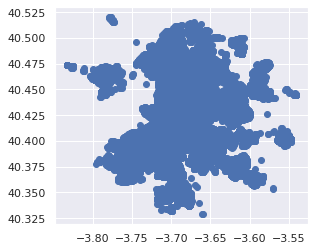

In [24]:
# Plot points in Madrid
mad_s2.plot()

In [25]:
# Check crs of mad_s2
mad_s2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

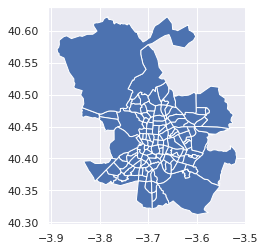

In [26]:
# Plot polygons of mad_neighb
mad_neighb.plot()

In [27]:
# Print crs of mad_neighb
mad_neighb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Display the first 5 rows of the geometry column, note its format
mad_neighb['geometry'].head()

NameError: name 'mad_neighb' is not defined

In [ ]:
# Display the first 5 rows of the geometry column, note its format
mad_s2['geometry'].head()

In [28]:
# Transform crs
mad_neighb_geom = mad_neighb.to_crs(25830)

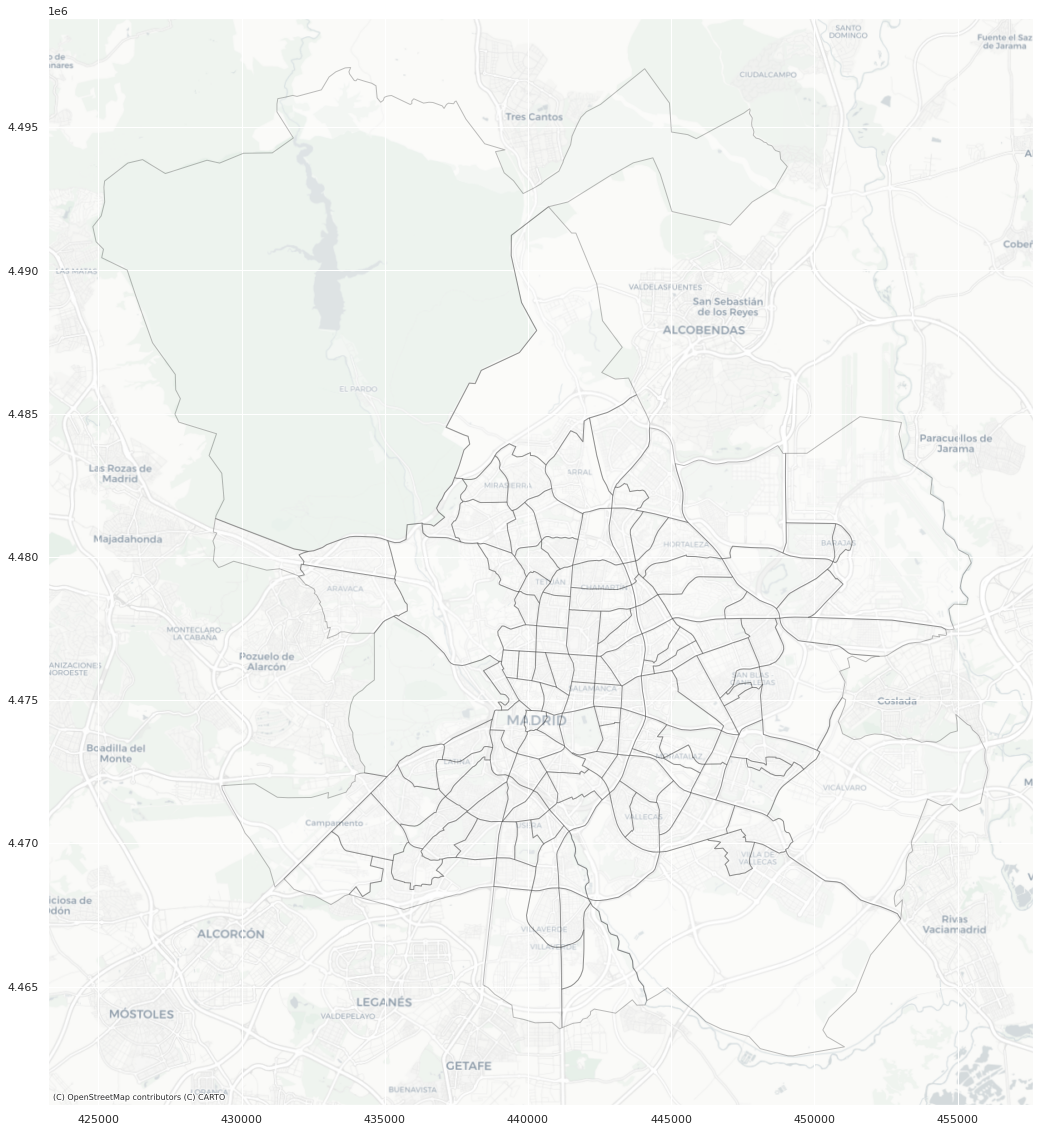

In [29]:
# Plot axis
f, (ax1) = plt.subplots(1, figsize=(20, 20))
# Plot neighbgeom 
mad_neighb_geom.plot(color='white',
               alpha=0.25,
               edgecolor='black', 
               ax=ax1)
# Add basemap
cx.add_basemap(ax1,
               crs="EPSG:25830",
               source=cx.providers.CartoDB.Positron)

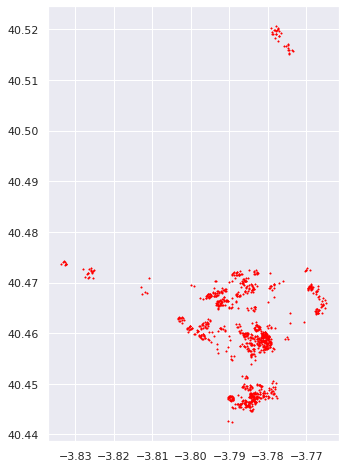

In [30]:
# Create subset of the data, including properties that are more than 4km from the nearest metro
mad_s3 = mad_s2[mad_s2["dist_metro"] > 4]

# Plot data subset
mad_s3.plot(marker='*', 
            color='red', 
            figsize=(12, 8), 
            markersize=1.5);

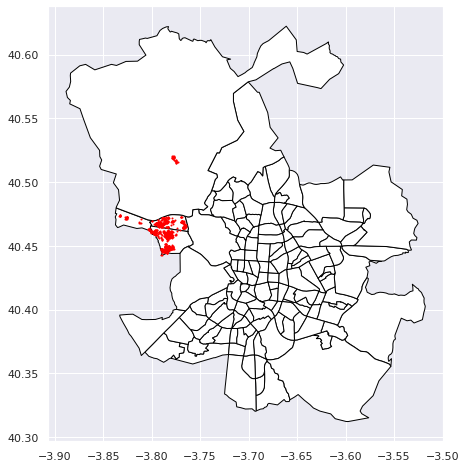

In [31]:
# Plot these properties
# base layer definition
base = mad_neighb.plot(color='white', 
                  edgecolor='black', 
                  figsize=(10, 8))

# we add large metro distance ads
mad_s3.plot(ax=base,
            marker='o', 
            color='red', 
            figsize=(12, 8), 
            markersize=1);

#### Geo-visualization

**Hex-Binning**

The Madrid map shows a lot of overlap in the points. When datasets have a large number of oberservations concentrated in one area it is harder to differentiate patterns. Hexagon binning is a form of bivariate histogram, which aggregates the data according to a hexagonal grid.

The underlying concept of hexagon binning =
1. the xy plane over the set (range(x), range(y)) is tessellated by a regular
grid of hexagons.
2. the number of points falling in each hexagon are counted and stored in a
data structure
3. the hexagons with count > 0 are plotted using a color ramp or varying
the radius of the hexagon in proportion to the counts.
The underlying algorithm is extremely fast and effective

[Lewin-Koh, 2021](https://cran.r-project.org/web/packages/hexbin/vignettes/hexagon_binning.pdf)

Read this fab [blog](https://carto.com/blog/hexagons-for-location-intelligence/) about using hexagon grids.


We will now visualise the density of adverts using hex-binning. To do so we will use the .hexbin function from the pandas library (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hexbin.html).
 

Text(0.5, 1.0, 'Madrid')

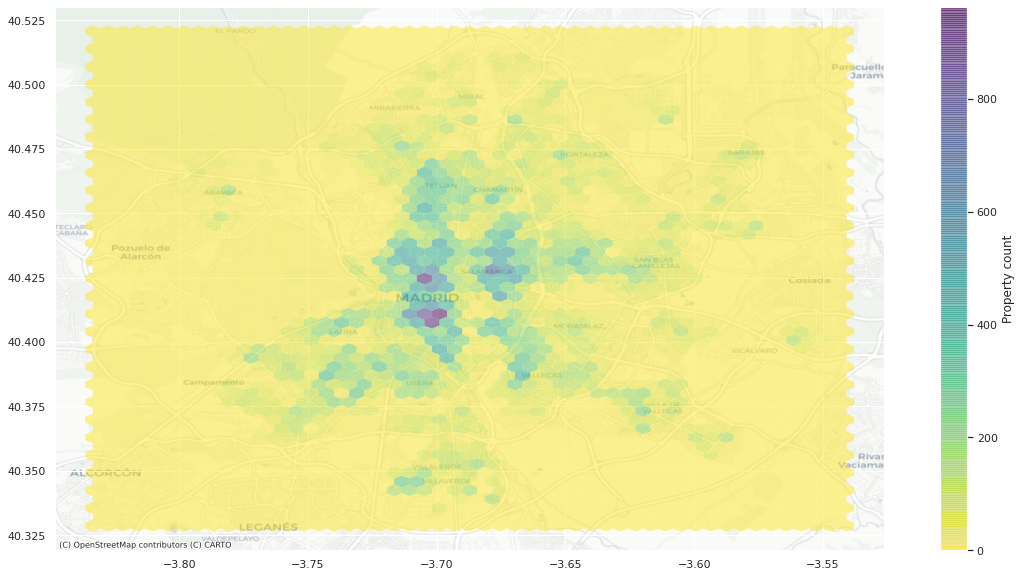

In [33]:
# Showing density with hex binning 
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 10))
# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    mad_s['long'], 
    mad_s['lat'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
cx.add_basemap(
    ax, 
    crs=mad_s2.crs,
    source=cx.providers.CartoDB.Positron
)

# Add colorbar
f.colorbar(hb, ax=ax, label='Property count')
# Remove axes
#ax.set_axis_off()
axs.set_title("Madrid")


Now we have visualised the location of the adverts we can take this further and look at the spatial variation in a attribute of interest using hex bins. 
Try changing the colours using the 'cmap' option. See [this resource](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html) for a list of colours and information on how to choose a good colour scheme for your  map.

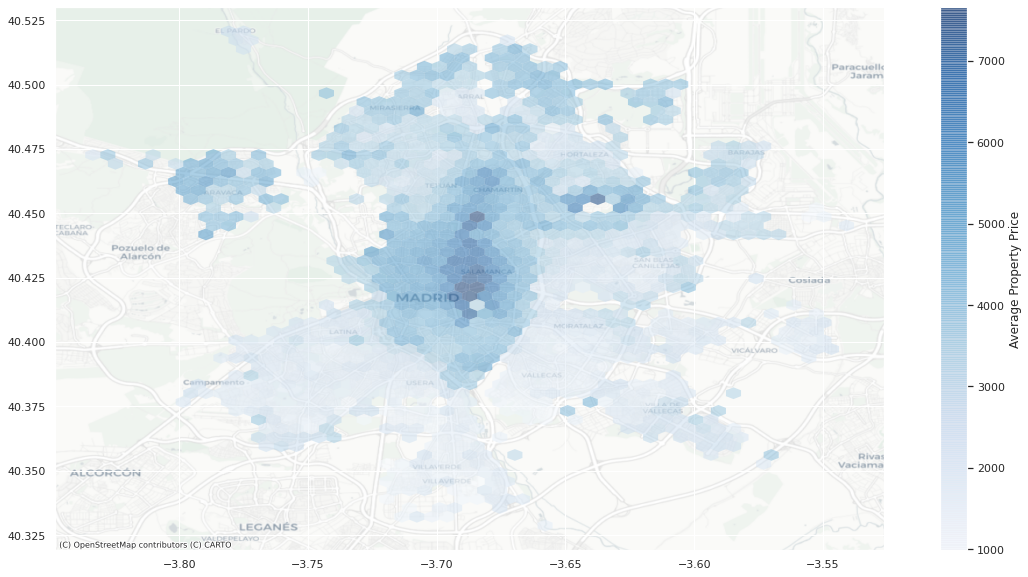

In [34]:
f, ax = plt.subplots(1, figsize=(20, 10))
hb2 = ax.hexbin(
    mad_s['long'],
    mad_s['lat'],
    mad_s['unitp'], # Change this line to explore other variables
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='Blues'
)
# Add basemap
cx.add_basemap(
    ax, 
    crs=mad_s2.crs,
    source=cx.providers.CartoDB.Positron
)
# Add colour bar
f.colorbar(hb2, ax=ax, label='Average Property Price')

* Properties are expensive in Salamanca (city centre)
* On average, house prices are higher in the north of the city

**Spatial KDE (heat map)**

We talked about KDE briefly in the first section. We can take this technique a step further and implement it over space using seaborns .kdeplot. (https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

KDE differs from hexbinning, rather then using discrete bins, they are continuous.


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Spatial KDE of properties advertised in Madrid (2018)')

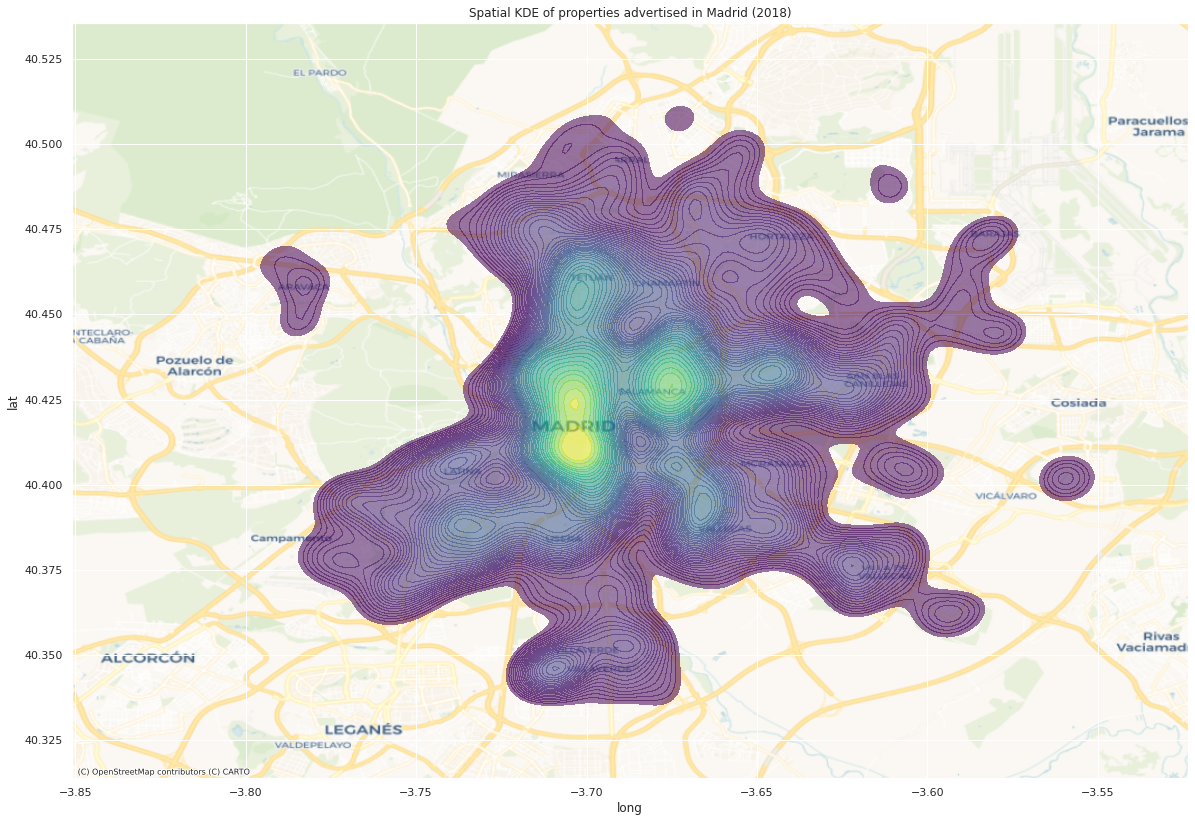

In [35]:
### KDE
# Set up figure and axis
f, axs = plt.subplots(1, figsize=(20, 20))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    mad_s['long'], 
    mad_s['lat'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis',
    ax=axs
)
#Add basemap
# Add basemap
cx.add_basemap(
    axs, 
    crs=mad_s2.crs,
    source=cx.providers.CartoDB.Voyager
)
# Remove axes
#ax.set_axis_off()
axs.set_title("Spatial KDE of properties advertised in Madrid (2018)")

* The heat map shows clearly the density of properties and potential sub-markets
* There are noteable clusters of properties on the outskirts of Madrid e.g. Aravaca 

**Point Pattern Visualisations**

In [ ]:
# Create map of raw counts across space
f, axs = plt.subplots(1, figsize=(20, 10))
# Madrid 
mad_s.plot.scatter(
    "long", 
    "lat",
    s=0.1,
    c="xkcd:bright yellow",
    alpha=0.5,
    ax=axs)
# remove axis
axs.set_axis_off()
# Add dark basemap
cx.add_basemap(
    axs, 
    crs="EPSG:4326",
    source=cx.providers.CartoDB.DarkMatter
)


axs.set_title("Listing data points in Madrid (2018)")

We can colour the points based on the value of their attributes. This doesn't require aggregation of the data, but we may encounter the problem of overplotting. Try changing the column ='p_decile' to explore different variables.

Text(0.5, 1.0, 'Price Decile')

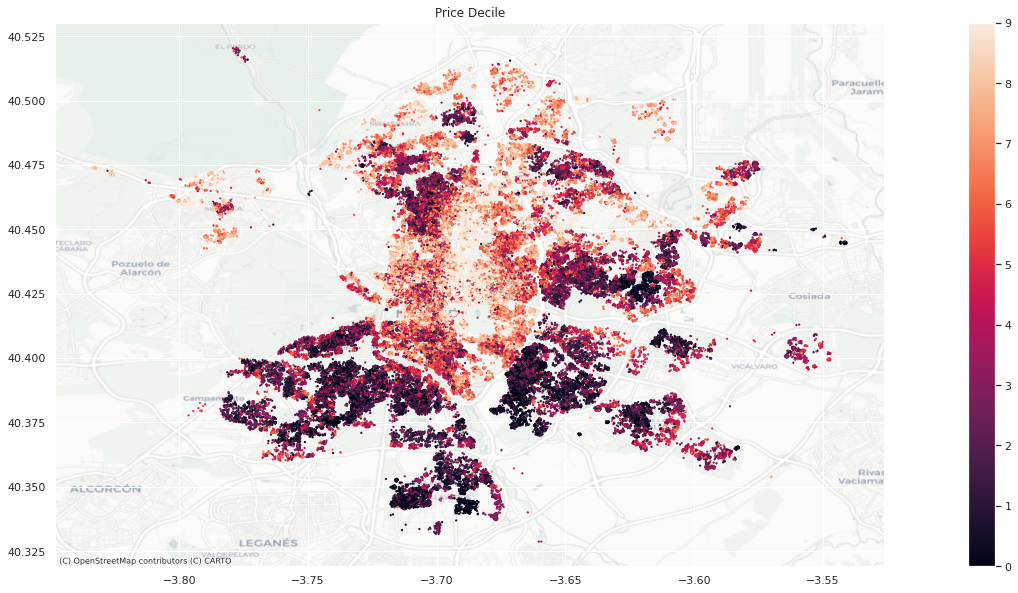

In [37]:
## Mapping the price deciles
# Setup figure and ax
f, axs = plt.subplots(1, figsize=(30, 10))
# Plot unique values choropleth including a legend and with no boundary lines
mad_s2.plot(
    column='p_decile', categorical=False, linewidth=0, ax=axs, markersize=5, legend=True   # Also try 'unitp'
)
cx.add_basemap(
    ax=axs, 
    source=cx.providers.CartoDB.Positron,
    crs=mad_s2.crs
)        
# Add title
axs.set_title("Price Decile")
# Display the map

* Plotting the price deciles shows a general North/ South divide in property prices
* There is still some overlap in the points, this map would be even better if it was interactive and you could zoom in on areas with lots of points
* Evidence of some distinctive neighbourhoods, for example in the South West of the map


**Sub setting the data**

The documentation for the .loc function can be found here (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [38]:
## try splitting the data and plotting different houses
# e.g. those built after 2010
aft10 = mad_s2.loc[mad_s['conyr']> 2010]

Text(0.5, 1.0, 'Unit Price of properties built after 2010')

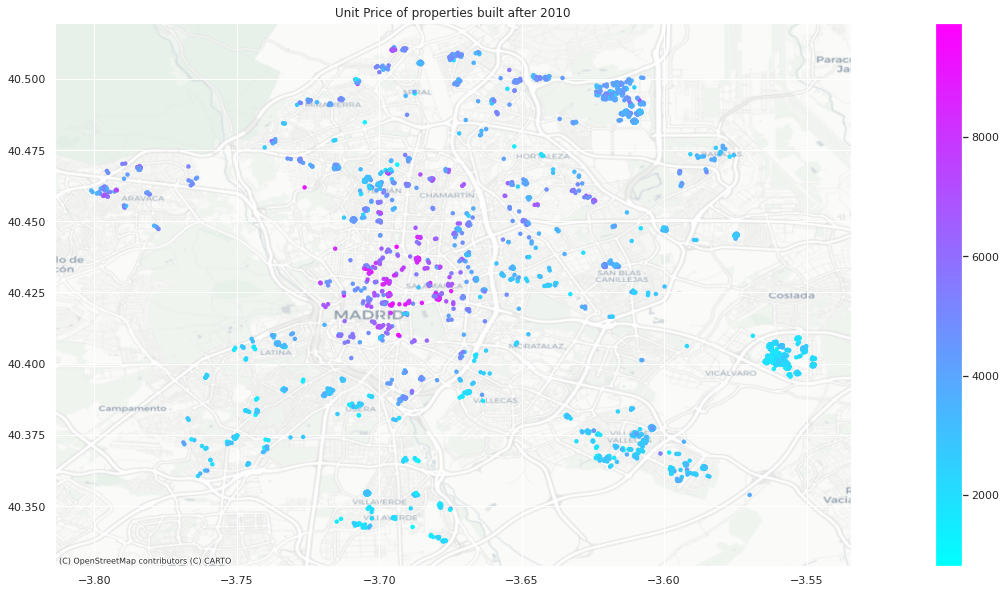

In [39]:
## Mapping the price deciles of homes built after 2010
# Setup figure and ax
f, axs = plt.subplots(1, figsize=(30, 10))
# Plot unique values choropleth including a legend and with no boundary lines
aft10.plot(
    column='unitp', categorical=False, linewidth=0, ax=axs, markersize=20, legend=True, cmap='cool'
)
cx.add_basemap(
    ax=axs, 
    source=cx.providers.CartoDB.Positron,
    crs=mad_s2.crs
)        
# Add title
axs.set_title("Unit Price of properties built after 2010")

* We can see that in the 2018 advert data, some expensive properties have been built in the centre and some cheaper houses in clusters on the outskirts 
* Generally, newly built properties in the North are more expensive
* It is interesting that properties are still being built in the city centre where we have seen there are lots of expensive houses

**Choropleth Mapping**

Choropleth Maps display divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable. This provides a way to visualise values over a geographical area, which can show variation or patterns across the displayed location.

The data variable uses colour progression to represent itself in each region of the map. Typically, this can be a blending from one colour to another, a single hue progression, transparent to opaque, light to dark or an entire colour spectrum.

One downside to the use of colour is that you can't accurately read or compare values from the map. Another issue is that larger regions appear more emphasised then smaller ones, so the viewer's perception of the shaded values are affected.

**Check out the boundaries we will use**

In [40]:
mad_distr = gpd.read_file('data/madrid/districts_mad.geojson')
mad_distr.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [41]:
## Some data manipulation 
# new crs definition
destination_crs = 'EPSG:4326'
# reprojection
mad_distr_geog = mad_distr.to_crs(destination_crs)
# show new crs
mad_distr_geog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'neighbourhood idealista Boundaries')

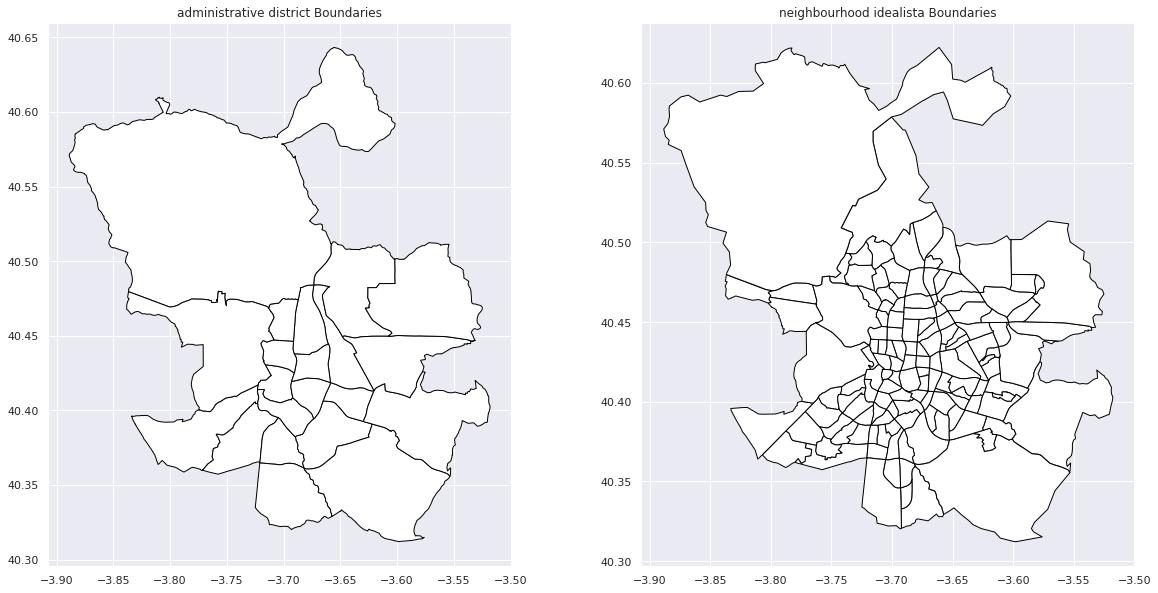

In [43]:
# Plot the 2 boundaries that we have 
# set up axis
f, axs = plt.subplots(1, 2, figsize=(20, 10))

mad_distr_geog.plot(color='white',
            edgecolor='black', 
            figsize=(10, 8),
            ax=axs[0])
mad_neighb.plot(color='white',
            edgecolor='black', 
            figsize=(10, 8),
            ax=axs[1])

# Add title
axs[0].set_title("administrative district Boundaries")
axs[1].set_title("neighbourhood idealista Boundaries")

**Create new data set which aggregates the points into areas**

In [51]:
# Convert to projected system
mad_s2_geom = mad_s2.to_crs(25830)
mad_neighb_geom = mad_neighb.to_crs(25830)

First option

In [52]:
# First option: a little bit slower (a lot of POLYGONs...)

# Use geopandas to do a spatial join
mad_s2_neighb = gpd.sjoin(mad_s2_geom, mad_neighb_geom, how='right') 

mad_neighb_agg = mad_s2_neighb.dissolve(by='locationname', aggfunc='median')       
mad_neighb_agg.head()

geometry  \
locationname                                                               
12 de Octubre-Orcasur  POLYGON ((441011.749 4469467.757, 441059.720 4...   
Abrantes               POLYGON ((437483.614 4469511.845, 437514.182 4...   
Acacias                POLYGON ((440501.818 4472750.898, 440554.820 4...   
Adelfas                POLYGON ((443407.198 4472669.470, 443336.535 4...   
Aeropuerto             POLYGON ((450201.725 4478204.689, 450382.720 4...   

                       index_left    period     price        unitp   area  \
locationname                                                                
12 de Octubre-Orcasur     60973.5  201809.0  151000.0  1515.073529  100.0   
Abrantes                  58566.0  201809.0  131000.0  1828.571429   77.0   
Acacias                   39914.5  201809.0  340000.0  4053.045923   86.0   
Adelfas                   40753.5  201809.0  380500.0  4145.161290   96.5   
Aeropuerto                66281.0  201812.0  112000.0  1900.000000   56.0   

                       room  bath  terrace  aircon  ...  maxfloor  dcount  \
locationname                                        ...                     
12 de Octubre-Orcasur   3.0   2.0      1.0     0.0  ...       6.0    22.0   
Abrantes                3.0   1.0      0.0     0.0  ...       5.0    17.0   
Acacias                 2.0   1.0      0.0     1.0  ...       7.0    31.5   
Adelfas                 3.0   2.0      0.0     0.0  ...       7.0    39.0   
Aeropuerto              2.0   1.0      0.0     0.0  ...       3.0     7.0   

                       quality  newdev  dist_city_centre  dist_metro  \
locationname                                                           
12 de Octubre-Orcasur      6.0     0.0          5.253568    0.457085   
Abrantes                   6.0     0.0          4.579542    0.263758   
Acacias                    5.0     0.0          1.630977    0.341084   
Adelfas                    4.0     0.0          3.278441    0.260614   
Aeropuerto                 7.0     0.0         10.993741    0.889314   

                           long        lat  count  p_decile  
locationname                                                 
12 de Octubre-Orcasur -3.697970  40.369543    1.0       2.0  
Abrantes              -3.728961  40.380410    1.0       1.0  
Acacias               -3.703671  40.402190    1.0       6.0  
Adelfas               -3.671229  40.400727    1.0       6.0  
Aeropuerto            -3.582125  40.450731    1.0       0.0  

[5 rows x 31 columns]

Second option

In [53]:
# Second option, faster

mad_s2_neighb_b = gpd.sjoin(mad_s2_geom, mad_neighb_geom[['geometry','locationname']])
mad_s2_neighb_b.head()

ID  period   price        unitp  area  room  bath  \
0     A15019136831406238029  201803  126000  2680.851064    47     1     1   
6559  A13317178758352788041  201803  108000  1421.052632    76     3     1   
6579   A4580058406990243641  201803  146000  1946.666667    75     0     1   
6648  A18358421103986858200  201803  210000  2413.793103    87     2     2   
6649  A12760275757741995501  201803  207000  2379.310345    87     2     2   

      terrace  aircon  parking  ...  newdev  dist_city_centre  dist_metro  \
0           0       1        0  ...       0          8.058429    0.872075   
6559        1       0        0  ...       0          7.164610    0.300817   
6579        0       1        0  ...       0          6.128439    0.498755   
6648        0       0        0  ...       0          8.102608    0.891646   
6649        0       0        0  ...       0          8.092701    0.863863   

          long        lat  count                        geometry  p_decile  \
0    -3.766933  40.362485      1  POINT (434882.000 4468273.000)         1   
6559 -3.753376  40.364475      1  POINT (436035.000 4468484.000)         0   
6579 -3.743419  40.370548      1  POINT (436886.000 4469150.999)         1   
6648 -3.767010  40.362007      1  POINT (434875.000 4468220.000)         3   
6649 -3.766608  40.361856      1  POINT (434909.000 4468203.000)         3   

      index_right        locationname  
0              11  Pau de Carabanchel  
6559           11  Pau de Carabanchel  
6579           11  Pau de Carabanchel  
6648           11  Pau de Carabanchel  
6649           11  Pau de Carabanchel  

[5 rows x 33 columns]

In [54]:
# Keep only some columns and get mean
mad_s2_neighb_b = mad_s2_neighb_b[['locationname','unitp']]

df_mad_neighb = mad_s2_neighb_b.groupby('locationname')['unitp'].mean().to_frame()
df_mad_neighb['unitp'] = round(df_mad_neighb['unitp'],2)
df_mad_neighb.head()

unitp
locationname                  
12 de Octubre-Orcasur  1722.85
Abrantes               1908.83
Acacias                4109.97
Adelfas                4217.82
Aeropuerto             1919.39

In [55]:
# Merge df with previous gdf
mad_neighb_agg_2 = mad_neighb_geom.merge(df_mad_neighb, on='locationname')
mad_neighb_agg_2.head()

locationid          locationname  \
0  0-EU-ES-28-07-001-079-01-005  Malasaña-Universidad   
1  0-EU-ES-28-07-001-079-16-004         Pinar del Rey   
2  0-EU-ES-28-07-001-079-15-003              Quintana   
3  0-EU-ES-28-07-001-079-06-001         Bellas Vistas   
4  0-EU-ES-28-07-001-079-04-006            Castellana   

                                            geometry    unitp  
0  POLYGON ((439512.222 4475766.433, 439243.849 4...  5066.96  
1  POLYGON ((444463.138 4479776.387, 444535.368 4...  2960.96  
2  POLYGON ((444367.612 4476195.260, 444410.736 4...  2819.46  
3  POLYGON ((440391.231 4478316.437, 440402.976 4...  3405.28  
4  POLYGON ((442359.628 4475997.861, 442400.761 4...  6577.73

**Plot a choropleth map of unit price**

When mapping the average price on a choropleth, we split the data to create categories. There are different ways of doing this. Check out this tutorial for different ways of doing this (http://darribas.org/gds15/content/labs/lab_04.html). In the example below we have used quantiles and equal intervals.

(423244.44936787453, 457618.0570693484, 4460854.311071059, 4498811.61864078)

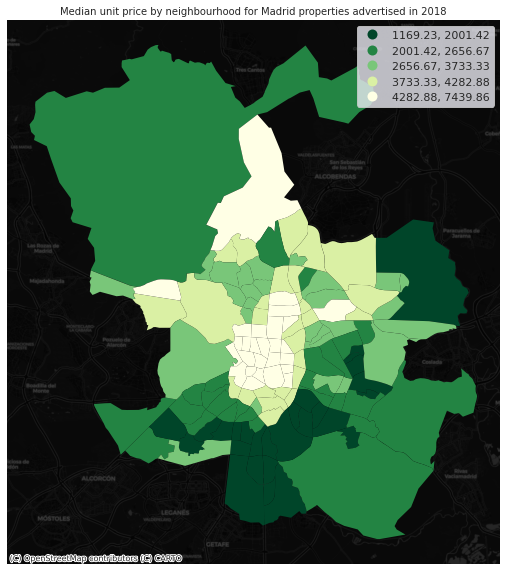

In [49]:
# plot a choropleth of mean unit price per area
f, axs = plt.subplots(1, figsize=(24, 10))

mad_neighb_agg.plot(column = 'unitp',
                    legend=True,
                    scheme='quantiles',
                    cmap='YlGn_r', # Use _r to reverse the colour scheme
                    linewidth=0,        
                    ax =axs,
                    figsize=(20, 8))
cx.add_basemap(
    ax=axs,
    source=cx.providers.CartoDB.DarkMatter,
    crs=mad_neighb_agg.crs
)  


# Add title
axs.set_title("Median unit price by neighbourhood for Madrid properties advertised in 2018", fontsize=10)
axs.axis('off')


* We can see from the map above that the choropleth has made it easier to get a general sense of the spatial pattern of house prices 
* Compared to the points, it has less detail, but is easier to interpret

(423244.44936787453, 457618.0570693484, 4460854.311071059, 4498811.61864078)

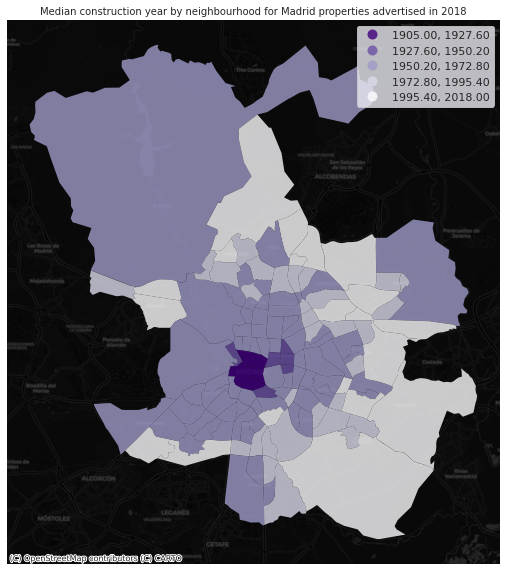

In [50]:
# plot a choropleth of construction year
f, axs = plt.subplots(1, figsize=(24, 10))
mad_neighb_agg.plot(column = 'conyr',
                    legend=True,
                    cmap='Purples_r',
                    linewidth=0,
                    scheme='Equal_Interval',
                    ax =axs,
                    alpha=0.8)       

cx.add_basemap(ax=axs,
               source=cx.providers.CartoDB.DarkMatter,
               crs=mad_neighb_agg.crs)

axs.set_title("Median construction year by neighbourhood for Madrid properties advertised in 2018",fontsize=10)
axs.axis('off')

* The oldest properties are located in the city centre (1905 - 1927)
* More houses on the outskirts built between 1995 and 2018
* The [Modifiable Area Unit Problem](https://www.gislounge.com/modifiable-areal-unit-problem-gis/) and the use of averages could be affecting the presentation the map

#### TASK
**Can you map a different variable on a choropleth using the administrative boundaries instead of the idealista boundaries?**

In [ ]:
# Choropleth using administrative boundaries 

#### Building footprints

We have downloaded the building footprints from the Cadastral. The data is a geodataframe with a polygon geometry for each building. We can use the building footprints to visualise housing attributes. This overcomes the issue of overplotting points. 

In [56]:
# Take a look at the format of the cadastral data 
mad_cadastre.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 124181 entries, 0 to 124180
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   id                                       124181 non-null  int64   
 1   gml_id                                   124181 non-null  object  
 2   beginlifespanversion                     124181 non-null  object  
 3   conditionofconstruction                  124181 non-null  object  
 4   beginning                                124181 non-null  object  
 5   end                                      124181 non-null  object  
 6   informationsystem                        124181 non-null  object  
 7   reference                                124181 non-null  object  
 8   localid                                  124181 non-null  object  
 9   namespace                                124181 non-null  object  
 10  horizontalge

In [57]:
mad_cadastre.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [58]:
# Plot the Castellana neighourhood
mad_neighb_castellana = mad_neighb_geom.loc[mad_neighb_geom.locationname == 'Castellana']
mad_neighb_castellana['geometry'].plot()

<AxesSubplot:>

Now, we explore the cadastral dataset. We can join the cadastral data to the neighbourhood polygons, to plot the building footprint of a single area.

In [59]:
# Create a centroid column in the cadastre data
mad_cadastre['centroid'] = mad_cadastre.centroid
# create new data frame and make centroid column spatial
mad_cadastre_centroid = mad_cadastre.set_geometry('centroid')
# Check it out 
mad_cadastre_centroid.head()

id                     gml_id beginlifespanversion  \
0  4903460  ES.SDGC.BU.1877503VK5717H  2016-09-22T00:00:00   
1  4870804  ES.SDGC.BU.1775508VK5717F  2006-09-04T00:00:00   
2  4939636  ES.SDGC.BU.2073403VK5727C  2002-02-26T00:00:00   
3  4927910  ES.SDGC.BU.1979105VK5717H  2002-02-26T00:00:00   
4  4902197  ES.SDGC.BU.1873825VK5717D  2016-09-22T00:00:00   

  conditionofconstruction            beginning                  end  \
0              functional  1985-01-01T00:00:00  1985-01-01T00:00:00   
1              functional  2002-01-01T00:00:00  2002-01-01T00:00:00   
2              functional  1976-01-01T00:00:00  1976-01-01T00:00:00   
3              functional  1960-01-01T00:00:00  1960-01-01T00:00:00   
4              functional  2006-01-01T00:00:00  2009-01-01T00:00:00   

                                   informationsystem       reference  \
0  https://www1.sedecatastro.gob.es/CYCBienInmueb...  1877503VK5717H   
1  https://www1.sedecatastro.gob.es/CYCBienInmueb...  1775508VK5717F   
2  https://www1.sedecatastro.gob.es/CYCBienInmueb...  2073403VK5727C   
3  https://www1.sedecatastro.gob.es/CYCBienInmueb...  1979105VK5717H   
4  https://www1.sedecatastro.gob.es/CYCBienInmueb...  1873825VK5717D   

          localid   namespace  ...  numberofdwellings  \
0  1877503VK5717H  ES.SDGC.BU  ...                  0   
1  1775508VK5717F  ES.SDGC.BU  ...                  0   
2  2073403VK5727C  ES.SDGC.BU  ...                  1   
3  1979105VK5717H  ES.SDGC.BU  ...                  1   
4  1873825VK5717D  ES.SDGC.BU  ...                  1   

                                        documentlink format  sourcestatus  \
0  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg   NotOfficial   
1  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg   NotOfficial   
2  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg   NotOfficial   
3  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg   NotOfficial   
4  http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...   jpeg   NotOfficial   

  officialareareference  value  value_uom endlifespanversion  \
0        grossFloorArea    780         m2               None   
1        grossFloorArea    603         m2               None   
2        grossFloorArea    144         m2               None   
3        grossFloorArea    255         m2               None   
4        grossFloorArea    314         m2               None   

                                            geometry  \
0  POLYGON ((451803.765 4477607.110, 451803.917 4...   
1  POLYGON ((451663.788 4477403.170, 451663.937 4...   
2  POLYGON ((451919.244 4477220.184, 451919.164 4...   
3  MULTIPOLYGON (((451807.378 4477685.139, 451807...   
4  POLYGON ((451710.680 4477088.680, 451710.770 4...   

                         centroid  
0  POINT (451810.815 4477598.908)  
1  POINT (451672.063 4477393.571)  
2  POINT (451914.841 4477222.069)  
3  POINT (451814.946 4477709.271)  
4  POINT (451723.646 4477088.488)  

[5 rows x 26 columns]

In [60]:
# Spatial join of neighbourhood polygon to the cadastre data 
mad_cadastre_castellana = gpd.sjoin(mad_cadastre_centroid, mad_neighb_castellana)

In [61]:
# Check out the data frame
mad_cadastre_castellana.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 551 entries, 10070 to 124073
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   id                                       551 non-null    int64   
 1   gml_id                                   551 non-null    object  
 2   beginlifespanversion                     551 non-null    object  
 3   conditionofconstruction                  551 non-null    object  
 4   beginning                                551 non-null    object  
 5   end                                      551 non-null    object  
 6   informationsystem                        551 non-null    object  
 7   reference                                551 non-null    object  
 8   localid                                  551 non-null    object  
 9   namespace                                551 non-null    object  
 10  horizontalgeometryestim

In [62]:
# Plot the centroids of each house
mad_cadastre_castellana.plot()

<AxesSubplot:>

<AxesSubplot:>

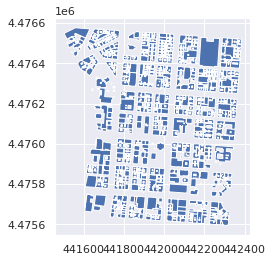

In [63]:
mad_cadastre_castellana_bf = mad_cadastre_castellana[['geometry','currentuse']]
crs=25830

mad_cadastre_castellana_bf = gpd.GeoDataFrame(mad_cadastre_castellana_bf, geometry='geometry', crs=crs)
mad_cadastre_castellana_bf.plot()

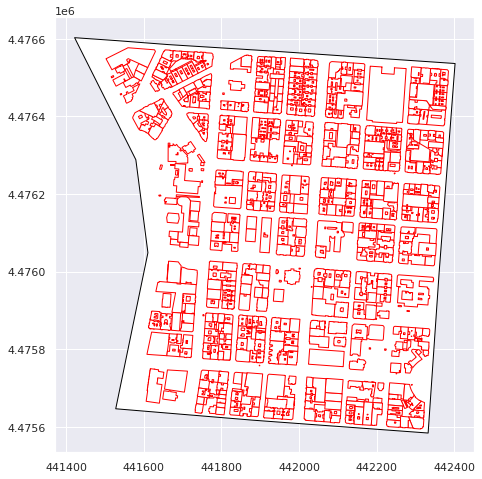

In [64]:
base = mad_neighb_castellana.plot(color='white', 
                  edgecolor='black', 
                  figsize=(10, 8))

mad_cadastre_castellana_bf.plot(ax=base,
                                color='white', 
                                edgecolor='red');

In [65]:
mad_cadastre_castellana_bf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 551 entries, 10070 to 124073
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    551 non-null    geometry
 1   currentuse  551 non-null    object  
dtypes: geometry(1), object(1)
memory usage: 12.9+ KB


<AxesSubplot:title={'center':'Castellana neighbourhood by current use'}>

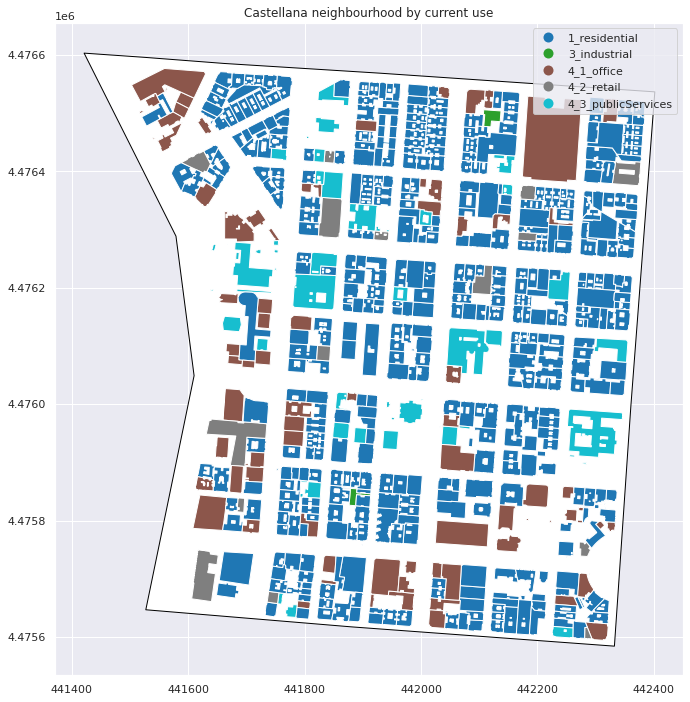

In [66]:
f, (ax1) = plt.subplots(1, figsize=(12, 12))

ax1.set_title("Castellana neighbourhood by current use")

base = mad_neighb_castellana.plot(ax=ax1,
                                  color='white',
                                  edgecolor='black', 
                                  figsize=(10, 8))

mad_cadastre_castellana_bf.plot(ax=ax1,
                                column='currentuse',
                                categorical=True,
                                legend=True)

## Section 2: Unsupervised Machine Learning (K- means clustering)

We will now move on to do some machine learning with the data. We are going to group the properties based on their attributes using an algorithmn called K-means. Check out this [user guide](https://scikit-learn.org/stable/modules/clustering.html) on the package. We will then be able to plot the categories to understand their spatial organisation into sub-markets.

A geodemographic analysis involves the classification of the areas that make up a greographical map into groups or categories of observations that are similar within each other but different between them. The classification is carried out using a statistical clustering algorithm that takes as input a set of attributes and returns the group (“labels” in the terminology) each observation belongs to. Depending on the particular algorithm employed, additional parameters, such as the desired number of clusters employed or more advanced tuning parameters (e.g. bandwith, radius, etc.), also need to be entered as inputs. ([Arribas-Bel, 2018](https://darribas.org/gds18/content/labs/lab_08.html)).

There are many expamples of geodemographic clustering in the fields of healthcare, retail, socio-economics, eduation and policy. For example [Singleton et al., (2020)](https://www.sciencedirect.com/science/article/pii/S0198971519307963). 

Although the underlying algorithm is not trivial, running K-means in Python is streamlined thanks to scikit-learn. Similar to the extensive set of available algorithms in the library, its computation is a matter of two lines of code. First, we need to specify the parameters in the KMeans method (which is part of scikit-learn’s cluster submodule) ([Arribas-Bel, 2018](https://darribas.org/gds18/content/labs/lab_08.html)).

#### Creating the clusters

In [9]:
# Create a list of featured to go in the clustering algorithm
features = [
    'unitp', 
    'room', 
    'bath', 
    'conyr', 
    'quality',
    'garden',
    'aircon'
]

In [22]:
# Create kmeans object
kmeans = cluster.KMeans(n_clusters=8, random_state=12345)

In [23]:
# Run the clustering algorithm for madrid
k5_mad = kmeans.fit(mad_s2[features])
mad_s2['k_mad'] = k5_mad.labels_

In [24]:
k5sizes_m = mad_s2.groupby('k_mad').size()

Text(0.5, 1.0, 'Madrid')

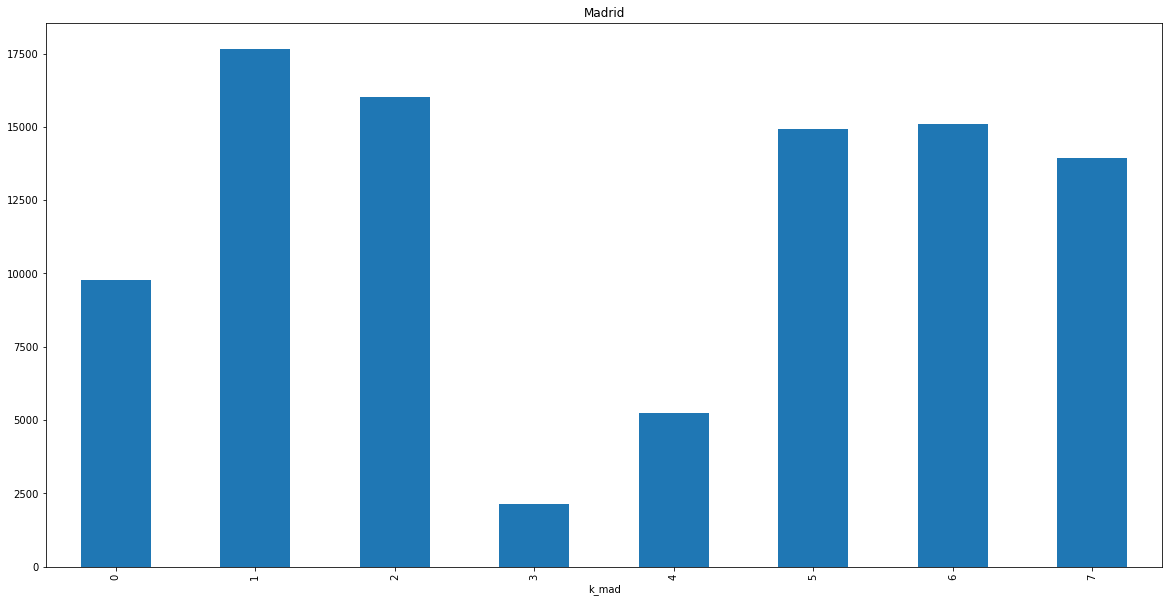

In [25]:
# Plot the range in cluster group sizes
f, axs = plt.subplots(1, figsize=(20, 10))
one = k5sizes_m.plot.bar(ax=axs)
axs.set_title("Madrid")

* 2 of the clusters (3 and 4) have significantly less properties than the others. This indicates we could use less clusters.

But what do the different clusters mean in terms of property attributes?

In [65]:
# Calculate the mean by group
kmeans_m = mad_s2.groupby('k_mad')[features].median()
# Show the table transposed (so it's not too wide)
    np.round(km

SyntaxError: unexpected EOF while parsing (<ipython-input-65-395456293dab>, line 4)

#### TASK
**Add in more variables to the list of features we are clustering on. How does this change the clusters?**

#### Mapping the clusters

We will start by mapping the clusters without any boundaries..

NameError: name 'mad_s2_geom' is not defined

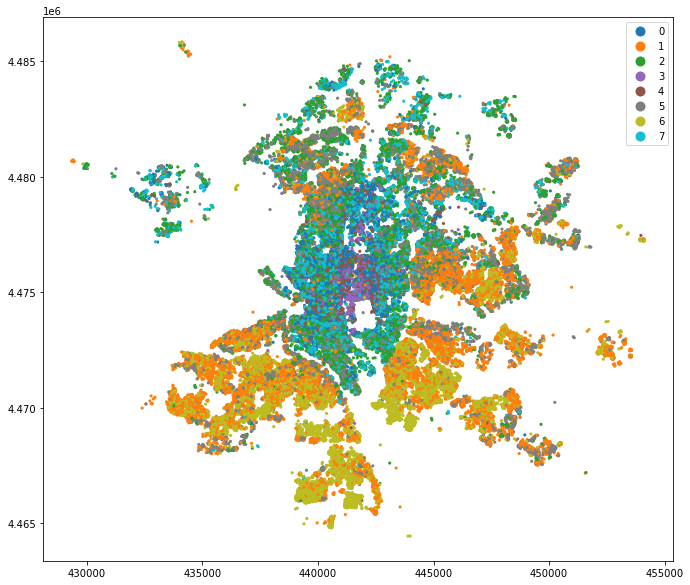

In [27]:
## Mapping the categories
# Setup figure and ax
f, axs = plt.subplots(1, figsize=(24, 10))
# Plot unique values choropleth including a legend and with no boundary lines
mad_s2.to_crs(25830).plot(column='k_mad', 
                          categorical=True, 
                          legend=True, 
                          linewidth=0, 
                          ax=axs, 
                          markersize=10)
cx.add_basemap(
    ax=axs, 
    source=cx.providers.CartoDB.Positron,
    crs=mad_s2_geom.crs
) 

axs.set_title("Madrid clustered")
# Display the map
plt.show()

* It is interesting that many similar properties tend to be near each other, indicating the presence of submarkets 
* For example group 3 are slustered in the city centre 
* Group 1 tend to be on the outskirts of the city centre

**Let's add in some boundaries**

In [28]:
# Plot unique values choropleth for Madrid including a legend and with district boundary lines
base = mad_distr.plot(color='white', 
                  edgecolor='black', 
                  figsize=(30, 30))

mad_s2.to_crs(25830).plot(ax=base,
            column='k_mad', categorical=True, legend=True, linewidth=0, markersize=6)

NameError: name 'mad_distr' is not defined

In [ ]:
# Plot unique values choropleth for Madrid including a legend and with district boundary lines
base_n = mad_neighb_geom.plot(color='white', 
                  edgecolor='black', 
                  figsize=(30, 30))

mad_s2.to_crs(25830).plot(ax=base_n,
            column='k_mad', categorical=True, legend=True, linewidth=0, markersize=6)

**Finally we can map the clusters with the building footprints**

This gives a good indication of where we are missing data.

In [87]:
mad_cadastre_geog = mad_cadastre.to_crs(4326)

In [ ]:
base = mad_distr_geog.plot(color='white', 
                  edgecolor='white', 
                  figsize=(30, 30))

mad_s2.plot(ax=base,
            column='k_mad', categorical=True, legend=True, linewidth=0, markersize=6)

mad_cadastre_geog.plot(ax=base,
                       color='white', edgecolor='black', alpha=0.05)

* How do both the boundaries compare with the location of clusters?
* We could also map the average cluster on a choropleth, to give a clearer picture of the spatial pattern of sub-markets
* The clusters could be used in future analysis e.g. in a hedonic model
* We could also use additional data in the clusters e.g. socio-demographic characteristics

#### Evaluating the clusters
Now we have created our classification, we need to asses how good our categories are. We also need to fine tune our parameters (number of clusters). There are a number of ways to do this, we will be looking at [silhoutte scores](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), and using [elbow plots](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f).

**Elbow plot**

To decide on the optimum number of clusters using an elbow plot, we need to select the value of k at the 'elbow', the point at which the line starts to decrease in a linear fashion.

In [18]:
# Create list for cluster measurement
Sum_of_squared_distances = []
# Create a range of values saved to K, as the number of clusters to try
K = range(1,15)
# For each number fit to k-means and calculate the sum of sqyared differences 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(mad_s2[features])
    Sum_of_squared_distances.append(km.inertia_)

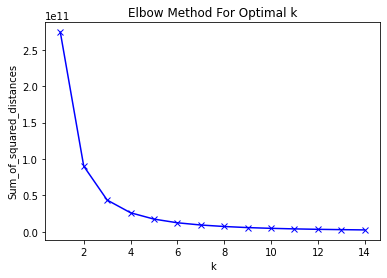

In [20]:
# Plot the scores 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')                                 # Add axis x label
plt.ylabel('Sum_of_squared_distances')          # Add axis y label
plt.title('Elbow Method For Optimal k')         # Add title
plt.show()

**Key points**
* The sum of sqaured distances gets close to 0 around 6 clusters
* Adding more than 8 clusters doesn't make much difference to the sqaured distances 
* According to the elbow plot, the optimal number of clusters is between 4 and 7

**Silhoutte score**

Silhouette analysis is used to explore the separation distance between the resulting clusters.  This measure has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters 
* Negative values indicate that those samples might have been assigned to the wrong cluster

In [66]:
## This will take a long time to run
# Instantiate the KMeans models
km = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model
km.fit_predict(mad_s2[features])

# Calculate Silhoutte Score
score = silhouette_score(mad_s2[features], km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.558


**Key points**
* If you have time, try changing the number of clusters and see how this affects the silhouette score
* A score 0f 0.55 for 4 clusters indicates that the quality of the clustering is okay but it could be better
* We could cluster the neighbourhoods (mad_s2_neigh) rather than the raw points

#### Section 2B: OPTIONAL EXERCISE
Repeat the cluster analysis for the other 2 cities. It would be interesting to combine the datasets and cluster across all three cities along the same criteria. Find the data in the github repository! 